In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df=pd.read_csv('/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


**Exploratory Data Analysis (EDA)**

Shape of Dataset
(550, 7)

unique elements in Features

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64

duplicated Series values
0

About Features : 

Name           100.0
Author         100.0
User Rating    100.0
Reviews        100.0
Price          100.0
Year           100.0
Genre          100.0
dtype: float64


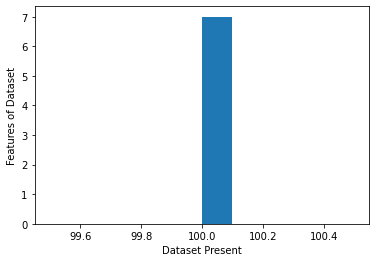


Pairwise correlation of all columns in the dataframe




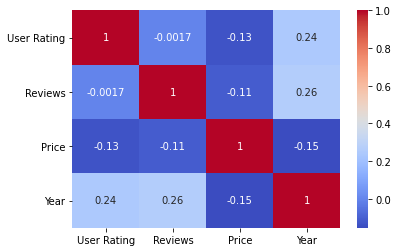

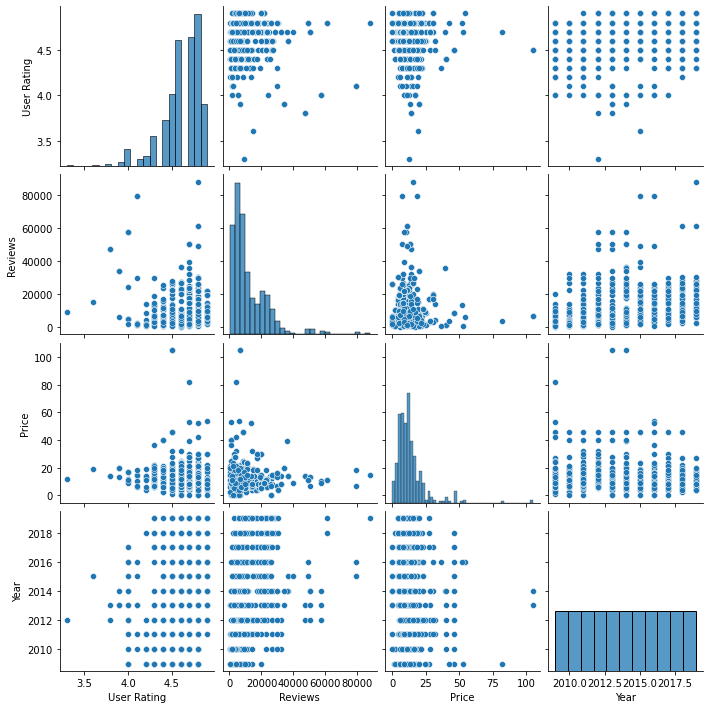

In [3]:
print("Shape of Dataset")
print(df.shape)
print()
print("unique elements in Features")
print()
print(df.nunique())
print()
print("duplicated Series values")
print(df.duplicated().sum())
print()
print("About Features : ")
print()
print(df.count()/df.isna().count()*100)
x=df.count()/df.isna().count()*100
plt.hist(x)
plt.ylabel("Features of Dataset")
plt.xlabel("Dataset Present")
plt.show()
#or we can use df.info() to get basic info about data 
print()
print('\033[1m'+"Pairwise correlation of all columns in the dataframe")
print()
df.corr()
print()
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
sns.pairplot(df)


Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

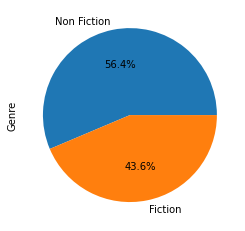

In [4]:
# Almost 56% rated as best selling books are Fiction
df['Genre'].value_counts().plot.pie(autopct="%.1f%%");
df['Genre'].value_counts()

Below Countplot shows the number of books(Count) that were fiction vs non fiction among the best sellers over the years. <br>
For all the years except 2014, the number of fiction best sellers have been greater than non fiction best sellers books.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


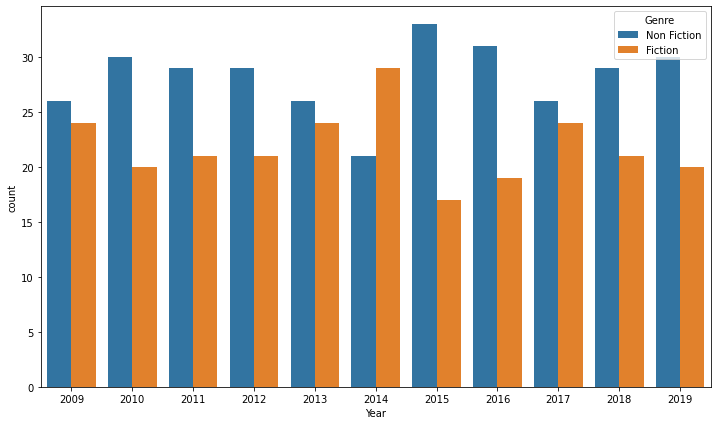

In [5]:
plt.figure(figsize=(12,7))
sns.countplot(df['Year'],hue=df['Genre'])
plt.show()

In [6]:
print('\033[1m'+"max User Rating")
print(df['User Rating'].max())
print()
print('\033[1m'+"Avg User Rating")
print(df['User Rating'].mean())
print()
print('\033[1m'+"Most Often User Rating")
print(df['User Rating'].mode())


max User Rating
4.9

Avg User Rating
4.618363636363637

Most Often User Rating
0    4.8
dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 864x432 with 0 Axes>

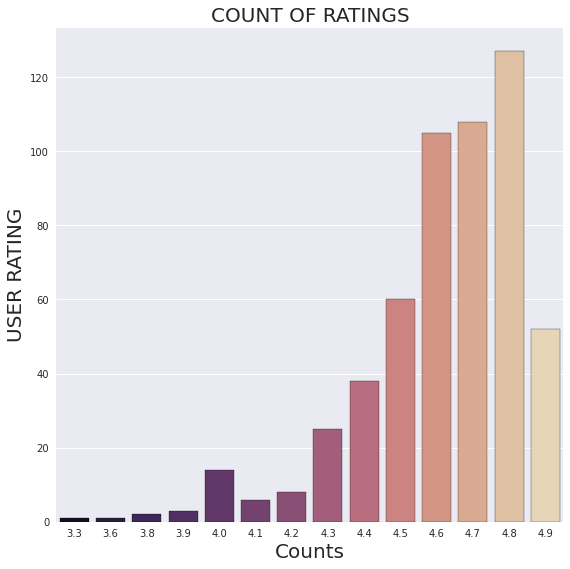

In [7]:
plt.figure(figsize=(12,6))
plt.style.use("seaborn")
plt.figure(figsize=(20,20))
plt.subplot(221)
fund= sns.countplot(df["User Rating"], palette="magma",edgecolor='black',saturation=0.50)
fund.set_xticklabels(fund.get_xticklabels(),fontsize=10)
plt.title("COUNT OF RATINGS",fontsize=20)
fund.set_xlabel("Counts", fontsize=20,)
fund.set_ylabel("USER RATING", fontsize=20)
plt.show()

In [8]:
#it tells us about number of books Author have !!
a=dict(df['Author'].value_counts())
b=list(a.items())
print(b[:10])

[('Jeff Kinney', 12), ('Suzanne Collins', 11), ('Gary Chapman', 11), ('Rick Riordan', 11), ('American Psychological Association', 10), ('Dr. Seuss', 9), ('Gallup', 9), ('Rob Elliott', 8), ("Bill O'Reilly", 7), ('Stephen R. Covey', 7)]


In [9]:
#Author's Books having Maximum rating: 4.9 
maxrating=df[df['User Rating']==4.9]
aumax=maxrating.groupby(['Author']).size().reset_index(name="Count")
aumax.sort_values(by='Count',ascending=False).head(20)

,Author,Count
5,Dr. Seuss,8
4,Dav Pilkey,7
7,Eric Carle,7
18,Sarah Young,6
6,Emily Winfield Martin,4
9,J.K. Rowling,3
19,Sherri Duskey Rinker,2
17,Rush Limbaugh,2
1,Bill Martin Jr.,2
13,Mark R. Levin,1


In [10]:
#'Where the Crawdads sing' Book of Delia Owens has maximum user reviews (87841).
print(df[df['Reviews']==df['Reviews'].max()])

                        Name       Author  User Rating  Reviews  Price  Year  \
534  Where the Crawdads Sing  Delia Owens          4.8    87841     15  2019   

       Genre  
534  Fiction  


In [11]:
#'Oh, the Places You'll Go!' Book of Dr. Seuss has maximum user reviews (21834) with highest rating books among amazon bestseller.
#This has also received highest ratings from users.
print(maxrating[maxrating['Reviews']==maxrating['Reviews'].max()])

                          Name     Author  User Rating  Reviews  Price  Year  \
245  Oh, the Places You'll Go!  Dr. Seuss          4.9    21834      8  2012   
246  Oh, the Places You'll Go!  Dr. Seuss          4.9    21834      8  2013   
247  Oh, the Places You'll Go!  Dr. Seuss          4.9    21834      8  2014   
248  Oh, the Places You'll Go!  Dr. Seuss          4.9    21834      8  2015   
249  Oh, the Places You'll Go!  Dr. Seuss          4.9    21834      8  2016   
250  Oh, the Places You'll Go!  Dr. Seuss          4.9    21834      8  2017   
251  Oh, the Places You'll Go!  Dr. Seuss          4.9    21834      8  2018   
252  Oh, the Places You'll Go!  Dr. Seuss          4.9    21834      8  2019   

       Genre  
245  Fiction  
246  Fiction  
247  Fiction  
248  Fiction  
249  Fiction  
250  Fiction  
251  Fiction  
252  Fiction  


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


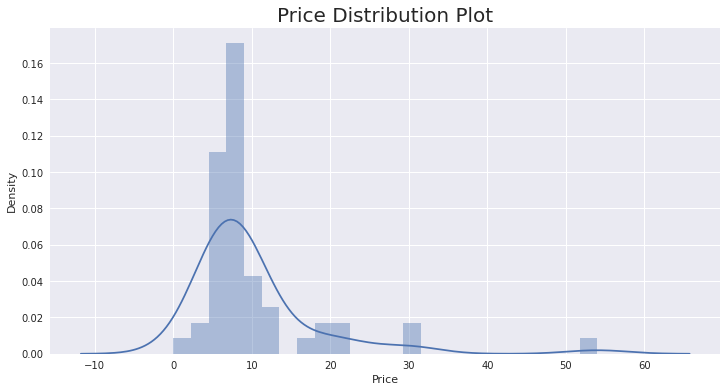

0    8
dtype: int64

In [12]:
#Most of books having rating 4.9 have price 8 
plt.figure(figsize=(12,6))
sns.distplot(maxrating['Price'])
plt.title('Price Distribution Plot',fontsize=20)
plt.show()
maxrating['Price'].mode()

In [13]:
from wordcloud import WordCloud, STOPWORDS


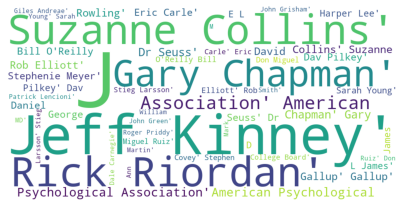

In [14]:
#we can see some names of author from [Author's Books having Maximum rating: 4.9 ] clearly 
imp_words = df['Author'].to_list()

wordcloud = WordCloud(width = 1000, height = 500, 
                background_color ='White', 
                min_font_size = 15).generate(str(imp_words))
plt.figure(figsize = (7,7)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show()

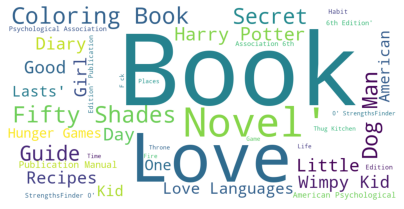

In [15]:
imp_words = df['Name'].to_list()

wordcloud = WordCloud(width = 1000, height = 500, 
                background_color ='White', 
                min_font_size = 15).generate(str(imp_words))
plt.figure(figsize = (7,7)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show()

In [22]:
# pip install autoviz
# pip install xlrd

In [23]:
import autoviz

In [24]:
from autoviz.AutoViz_Class import AutoViz_Class


Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


In [25]:
av=AutoViz_Class()


Shape of your Data Set: (550, 7)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  1
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    7 Predictors classified...
        This does not include the Target column(s)
        2 variables removed since they were ID or low-information variables


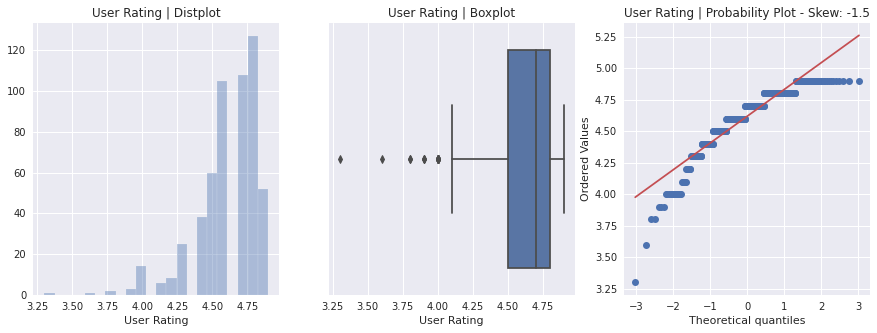

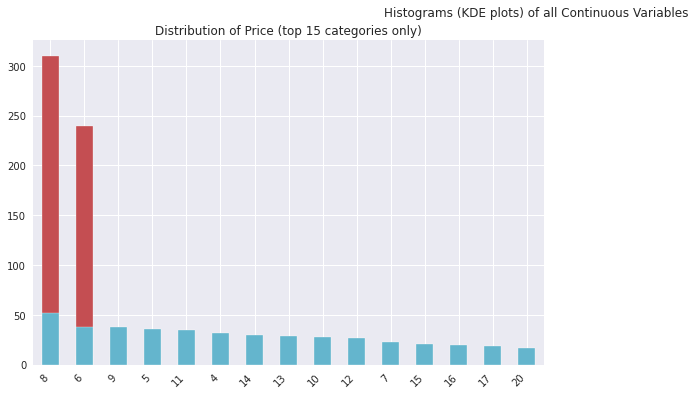

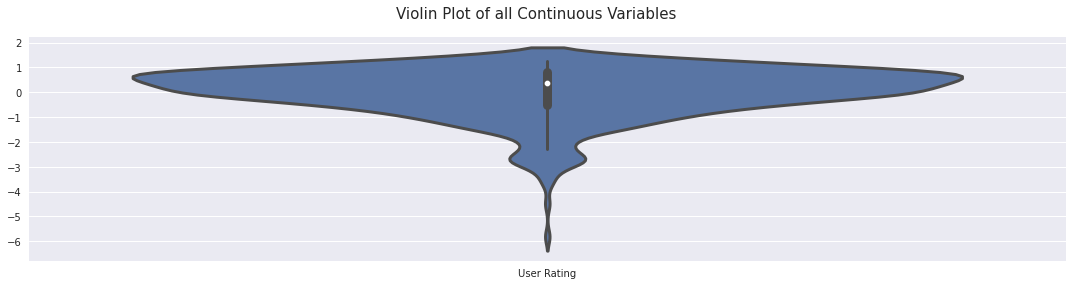

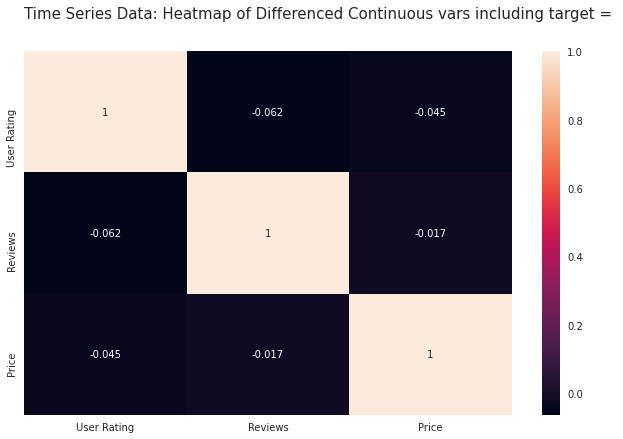

<Figure size 1080x0 with 0 Axes>

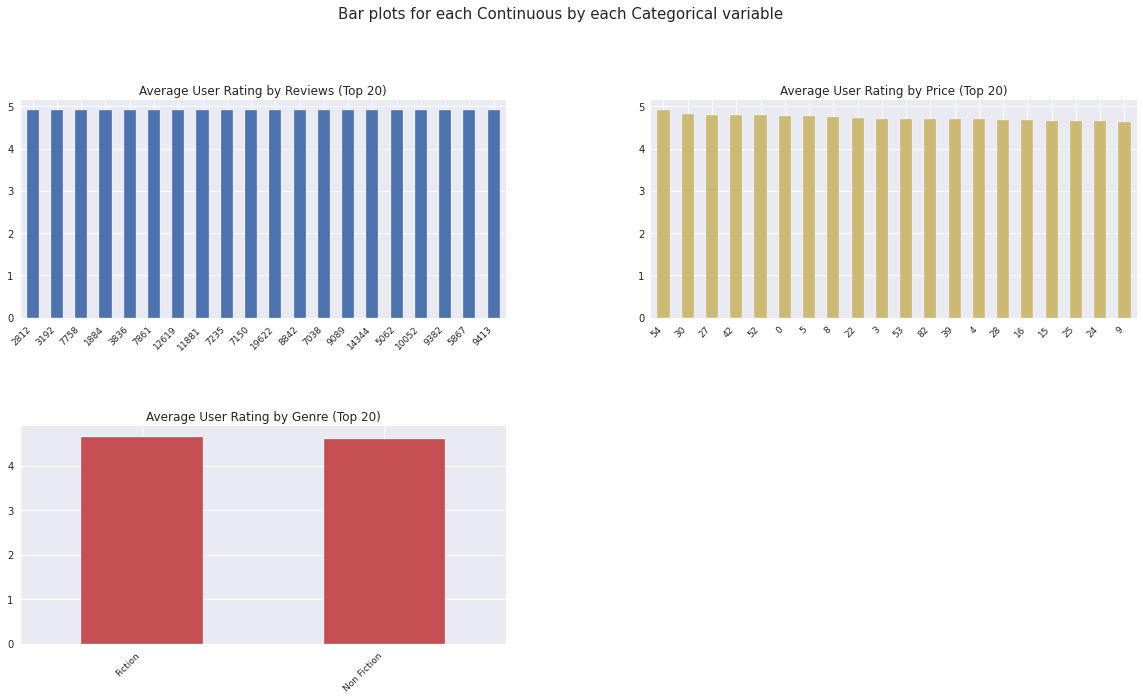

Time to run AutoViz (in seconds) = 2.765

 ###################### VISUALIZATION Completed ########################


In [26]:
autoviz_eda=av.AutoViz('/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv',verbose=0)

**Predict User Rating of a Book**

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics


LE=LabelEncoder()

LE.fit(df['Genre'])
df['Genre']=LE.transform(df['Genre'])
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,1
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,1
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,1


In [28]:
col =["Reviews","Price","Year","Genre"]
# X =df.[[col]].values 
X =df.iloc[:,3:8].values 
y =df[["User Rating"]]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# import 
from sklearn.linear_model import LinearRegression

# object
model = LinearRegression()
# training - > fit

model.fit(X_train, y_train)

LinearRegression()

In [31]:
Prediction=model.predict(X_test)

In [32]:
Prediction.shape

(110, 1)

In [33]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, Prediction)))

RMSE:  0.22955784515261451


In [34]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
m1 = RandomForestRegressor()
m1.fit(X_train, y_train)

RandomForestRegressor()

In [35]:
Prediction=m1.predict(X_test)

In [36]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, Prediction)))

RMSE:  0.20629929713888978


In [37]:
# Gradient Boosting 
from sklearn.ensemble import GradientBoostingRegressor
m2 = GradientBoostingRegressor()
m2.fit(X_train, y_train)

GradientBoostingRegressor()

In [38]:
Prediction=m2.predict(X_test)

In [39]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, Prediction)))

RMSE:  0.20978865187928583


In [40]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=11).fit(X_train , y_train)

In [41]:
Prediction=dt.predict(X_test)

In [42]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, Prediction)))

RMSE:  0.25564803107115586


So According to RMSE,
Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.[(Source Google)](https://www.google.com/search?q=RMSE)<br>

We can see that Decision Tree was the worst model among Linear and Others in Predicting Reviews though linear regression has done quiet good work but still Gradient Boosting and Random Forest Have very much low RMSE value shows that it better predicts the Reviews than both of the above <bR>
But we can still improve the result by removing Outliers 


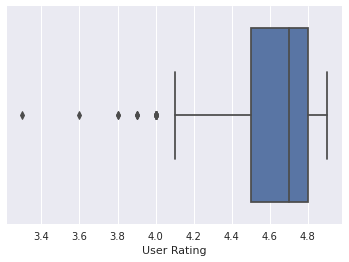

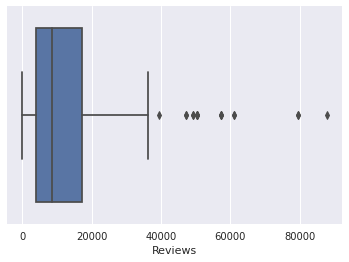

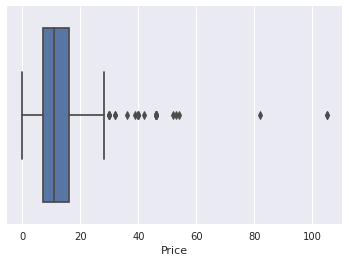

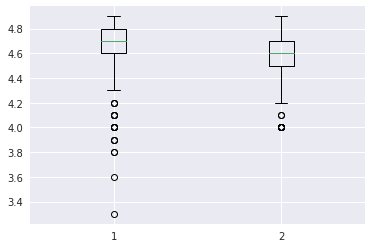

In [45]:
# general trend + Outlier
sns.boxplot(df["User Rating"])
plt.show()
sns.boxplot(df["Reviews"])
plt.show()
sns.boxplot(df["Price"])
plt.show()
plt.boxplot([df[df['Genre']=='Fiction']['User Rating'], df[df['Genre']=='Non Fiction']['User Rating']])
plt.show()